In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing

In [ ]:
models={}

In [ ]:
def graf(model_history):
    plt.figure(figsize=(16, 16))
    ax1 = plt.subplot(2,2,1)
    ax1.set_title('Loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')

    ax2 = plt.subplot(2,2,2)
    ax2.set_title('Mae')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('mae')

    sum_loss = []
    sum_mae = []
    for history in model_history:
        ax1.plot(history.epoch, history.history['loss'])
        ax2.plot(history.epoch, history.history['mae'])
        sum_loss = [x+y for x, y in zip_longest(sum_loss, history.history['loss'], fillvalue=0)]
        sum_mae = [x+y for x, y in zip_longest(sum_mae, history.history['mae'], fillvalue=0)]

    mean_loss = [loss/len(model_history) for loss in sum_loss]
    mean_mae = [mae/len(model_history) for mae in sum_mae]

    ax3 = plt.subplot(2,2,3)
    ax3.set_title('Mean Loss')
    ax3.set_xlabel('epoch')
    ax3.set_ylabel('loss')
    ax3.plot(history.epoch, mean_loss)

    ax4 = plt.subplot(2,2,4)
    ax4.set_title('Mean Mae')
    ax4.set_xlabel('epoch')
    ax4.set_ylabel('mae')
    ax4.plot(history.epoch, mean_mae)
    plt.show()

In [ ]:
def statistics(models):
    for key, value in models.items():
        print(value["name"]+"\tk="+str(value["k"])+"\tepoch="+str(value["eposh"])+"\tsred_loss="+str(value["sred_loss"])+"\tsred_mae="+str(value["sred_mae"]))
        
#         "name": model_name, 
#         "k":k, 
#         "eposh":num_epochs, 
#         "sred_loss": round(np.mean(model_loss), 4), 
#         "sred_mae": round(np.mean(scores), 4)
        
#         print("Модель #"+str(key+1))
#         print("epohs: "+str(value["epochs"])+"\tbatch: "+str(value["batch_size"]))
#         hist = value['hist']
#         print("loss: "+ 
#               str(hist.history['loss'][len(hist.history['loss'])-1])
#               + " - accuracy: " + 
#               str(hist.history['accuracy'][len(hist.history['accuracy'])-1])+"\n")

**Измененеие цен на дома в пригороде Бостона**

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(test_targets)

(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


**Нормализация набора данных**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)

In [ ]:
train_data /= std
test_data -= mean
test_data /= std

**Функция построения модели**

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    #mse - среднеквадратичная ошибка.
    #mae - средняя абсолютная ошибка. Абсолютное значение разности 
    #между предсказанными и целевыми значениями.
    return model

**Модель#1. k=4, epoch=100**

In [ ]:
model_name = "model#1"
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
scores = []
model_loss=[]
model_history = []
for i in range(k):
    #print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    model_history.append(history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    scores.append(val_mae)
    model_loss.append(round(val_mse, 4))

    print(f"k = {i}\tloss = {round(history.history['loss'][-1], 4)}\tmae = {round(history.history['mae'][-1], 4)}\tval_loss = {round(val_mse, 4)}\tval_mae = {round(val_mae, 4)}")
    
print(f"\nsred mae = {round(np.mean(scores), 4)}")
models[1] = {"name": model_name, "k":k, "eposh":num_epochs, "sred_loss": round(np.mean(model_loss), 4), "sred_mae": round(np.mean(scores), 4)}

k = 0	loss = 3.9084	mae = 1.3345	val_loss = 8.8374	val_mae = 2.0892
k = 1	loss = 3.993	mae = 1.2761	val_loss = 7.95	val_mae = 2.1138
k = 2	loss = 2.8108	mae = 1.2475	val_loss = 13.5599	val_mae = 2.372
k = 3	loss = 4.1817	mae = 1.3193	val_loss = 11.7943	val_mae = 2.4821

sred mae = 2.2643


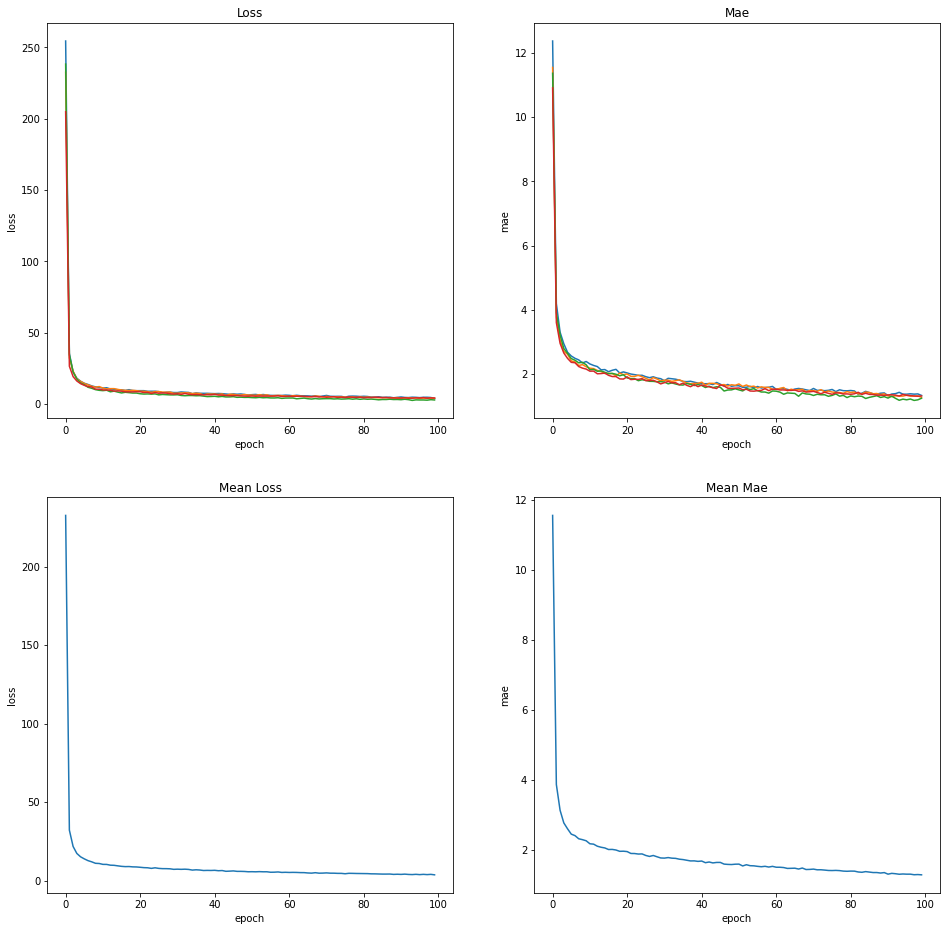

In [ ]:
graf(model_history)

**Модель#2. k=4, epoch=50**

In [ ]:
model_name = "model#2"
k = 4
num_val_samples = len(train_data) // k
num_epochs = 50
scores = []
model_loss=[]
model_history = []
for i in range(k):
    #print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    model_history.append(history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    scores.append(val_mae)
    model_loss.append(round(val_mse, 4))

    print(f"k = {i}\tloss = {round(history.history['loss'][-1], 4)}\tmae = {round(history.history['mae'][-1], 4)}\tval_loss = {round(val_mse, 4)}\tval_mae = {round(val_mae, 4)}")
    
print(f"\nsred mae = {round(np.mean(scores), 4)}")
models[0] = {"name": model_name, "k":k, "eposh":num_epochs, "sred_loss": round(np.mean(model_loss), 4), "sred_mae": round(np.mean(scores), 4)}

k = 0	loss = 6.8602	mae = 1.6593	val_loss = 8.6338	val_mae = 1.9602
k = 1	loss = 6.3041	mae = 1.6777	val_loss = 10.7482	val_mae = 2.5039
k = 2	loss = 4.7964	mae = 1.5385	val_loss = 12.7851	val_mae = 2.3854
k = 3	loss = 5.872	mae = 1.6005	val_loss = 12.3482	val_mae = 2.5602

sred mae = 2.3524


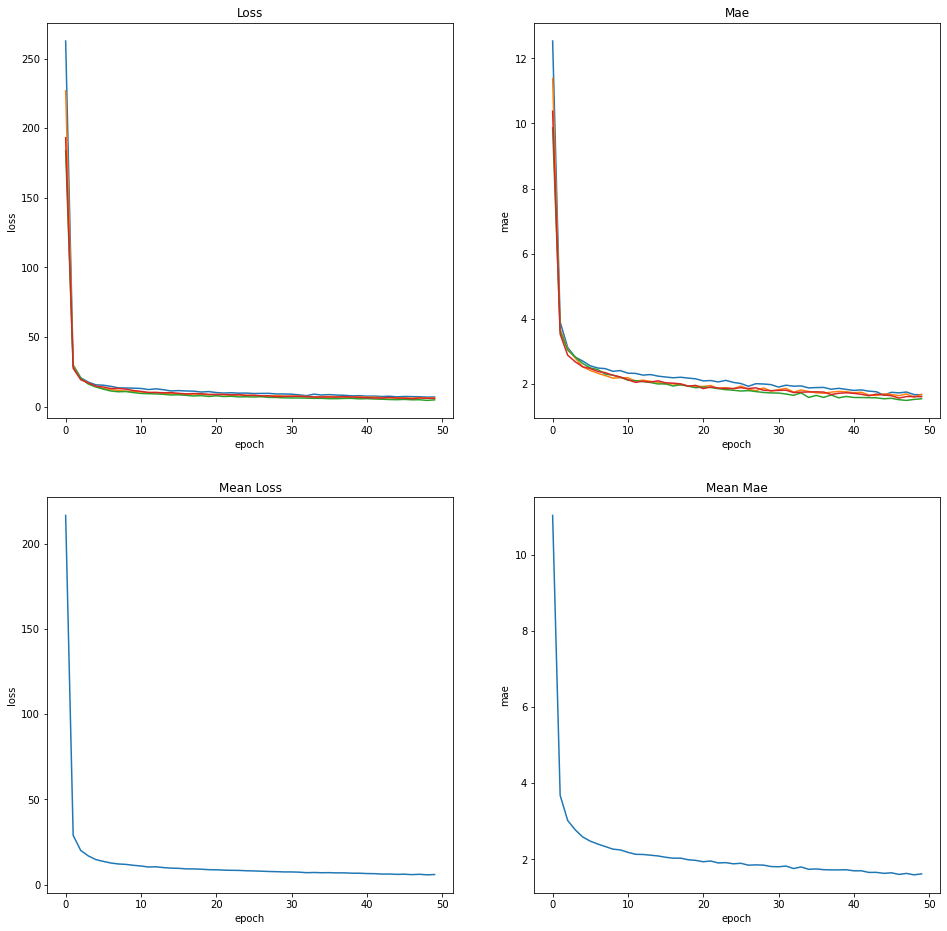

In [ ]:
graf(model_history)

**Модель#3. k=4, epoch=150**

In [ ]:
model_name = "model#3"
k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
scores = []
model_loss=[]
model_history = []
for i in range(k):
    #print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    model_history.append(history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    scores.append(val_mae)
    model_loss.append(round(val_mse, 4))

    print(f"k = {i}\tloss = {round(history.history['loss'][-1], 4)}\tmae = {round(history.history['mae'][-1], 4)}\tval_loss = {round(val_mse, 4)}\tval_mae = {round(val_mae, 4)}")
    
print(f"\nsred mae = {round(np.mean(scores), 4)}")
models[2] = {"name": model_name, "k":k, "eposh":num_epochs, "sred_loss": round(np.mean(model_loss), 4), "sred_mae": round(np.mean(scores), 4)}

k = 0	loss = 2.9721	mae = 1.2514	val_loss = 8.7923	val_mae = 2.149
k = 1	loss = 2.1816	mae = 1.0509	val_loss = 27.0016	val_mae = 2.921
k = 2	loss = 1.9019	mae = 0.9998	val_loss = 16.5185	val_mae = 2.6274
k = 3	loss = 2.5767	mae = 1.0383	val_loss = 12.9967	val_mae = 2.6522

sred mae = 2.5874


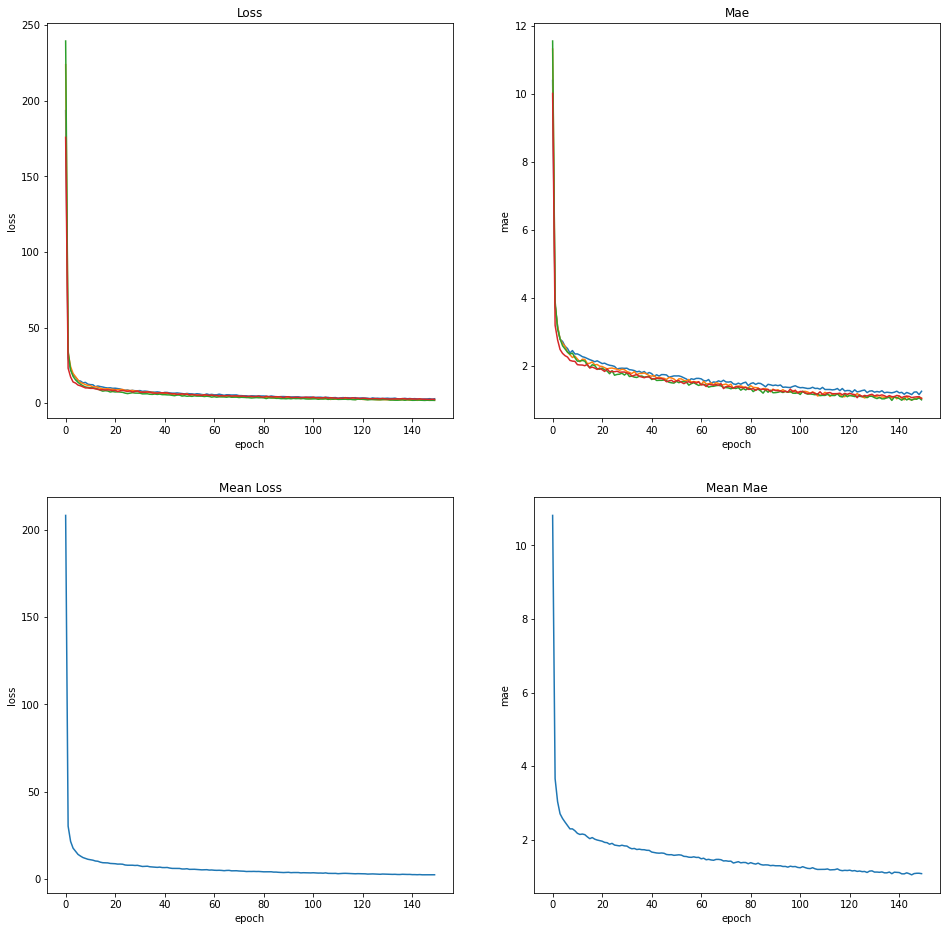

In [ ]:
graf(model_history)

**Модель#4. k=5, epoch=50**

In [ ]:
model_name = "model#4"
k = 5
num_val_samples = len(train_data) // k
num_epochs = 50
scores = []
model_loss=[]
model_history = []
for i in range(k):
    #print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    model_history.append(history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    scores.append(val_mae)
    model_loss.append(round(val_mse, 4))

    print(f"k = {i}\tloss = {round(history.history['loss'][-1], 4)}\tmae = {round(history.history['mae'][-1], 4)}\tval_loss = {round(val_mse, 4)}\tval_mae = {round(val_mae, 4)}")
    
print(f"\nsred mae = {round(np.mean(scores), 4)}")
models[3] = {"name": model_name, "k":k, "eposh":num_epochs, "sred_loss": round(np.mean(model_loss), 4), "sred_mae": round(np.mean(scores), 4)}

k = 0	loss = 7.6803	mae = 1.7791	val_loss = 7.6107	val_mae = 1.786
k = 1	loss = 5.1826	mae = 1.5323	val_loss = 10.8058	val_mae = 2.4219
k = 2	loss = 6.1179	mae = 1.591	val_loss = 7.7645	val_mae = 2.0912
k = 3	loss = 4.7681	mae = 1.4615	val_loss = 15.7673	val_mae = 2.4265
k = 4	loss = 6.0291	mae = 1.5682	val_loss = 11.0145	val_mae = 2.4935

sred mae = 2.2438


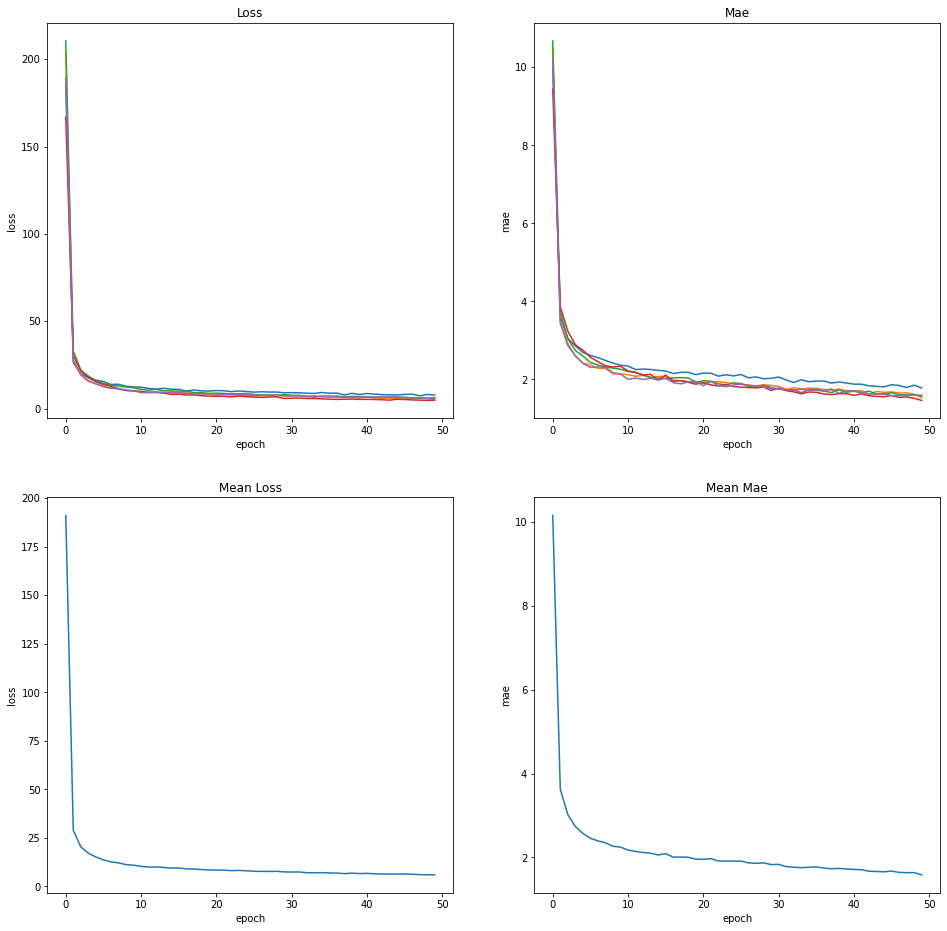

In [ ]:
graf(model_history)

**Модель#5. k=5, epoch=100**

In [ ]:
model_name = "model#5"
k = 5
num_val_samples = len(train_data) // k
num_epochs = 100
scores = []
model_loss=[]
model_history = []
for i in range(k):
    #print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    model_history.append(history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    scores.append(val_mae)
    model_loss.append(round(val_mse, 4))

    print(f"k = {i}\tloss = {round(history.history['loss'][-1], 4)}\tmae = {round(history.history['mae'][-1], 4)}\tval_loss = {round(val_mse, 4)}\tval_mae = {round(val_mae, 4)}")
    
print(f"\nsred mae = {round(np.mean(scores), 4)}")
models[4] = {"name": model_name, "k":k, "eposh":num_epochs, "sred_loss": round(np.mean(model_loss), 4), "sred_mae": round(np.mean(scores), 4)}

k = 0	loss = 5.2312	mae = 1.4652	val_loss = 8.4158	val_mae = 1.8817
k = 1	loss = 3.1834	mae = 1.2528	val_loss = 12.0789	val_mae = 2.6269
k = 2	loss = 4.1436	mae = 1.3414	val_loss = 7.5618	val_mae = 2.1688
k = 3	loss = 2.8186	mae = 1.2298	val_loss = 16.9197	val_mae = 2.5654
k = 4	loss = 3.8776	mae = 1.295	val_loss = 11.754	val_mae = 2.4365

sred mae = 2.3359


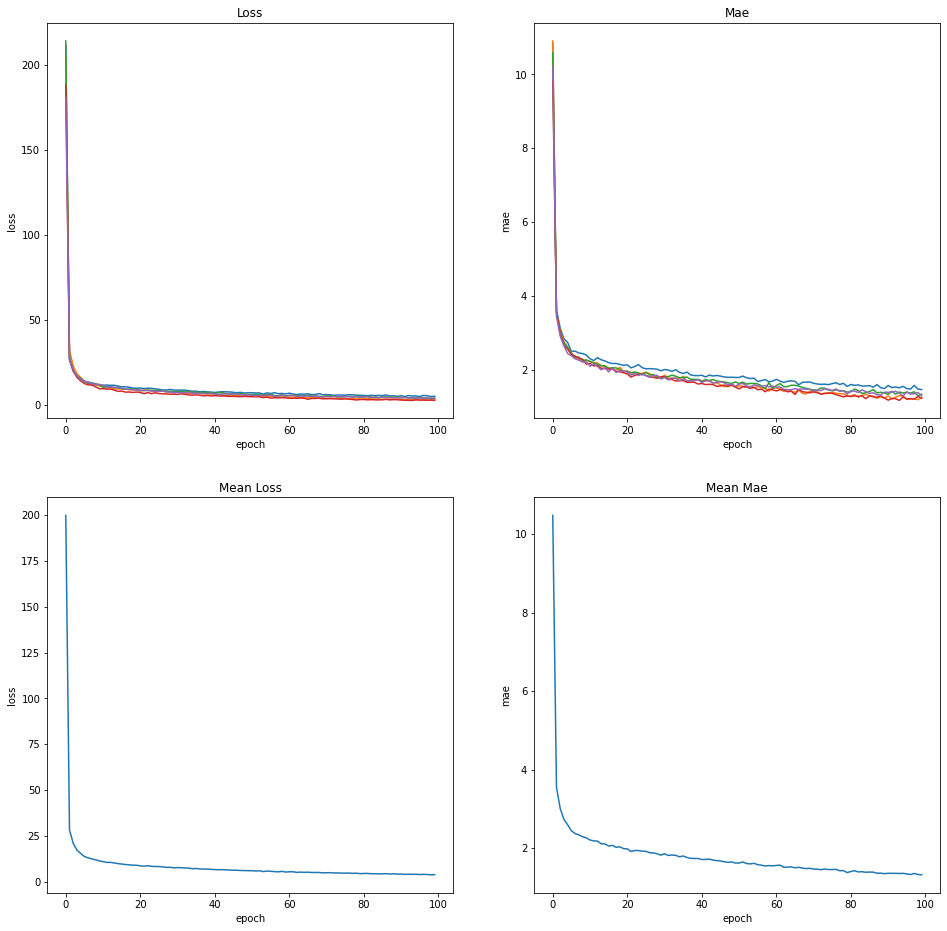

In [ ]:
graf(model_history)

**Модель#6. k=5, epoch=150**

In [ ]:
model_name = "model#6"
k = 5
num_val_samples = len(train_data) // k
num_epochs = 150
scores = []
model_loss=[]
model_history = []
for i in range(k):
    #print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    model_history.append(history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    scores.append(val_mae)
    model_loss.append(round(val_mse, 4))

    print(f"k = {i}\tloss = {round(history.history['loss'][-1], 4)}\tmae = {round(history.history['mae'][-1], 4)}\tval_loss = {round(val_mse, 4)}\tval_mae = {round(val_mae, 4)}")
    
print(f"\nsred mae = {round(np.mean(scores), 4)}")
models[5] = {"name": model_name, "k":k, "eposh":num_epochs, "sred_loss": round(np.mean(model_loss), 4), "sred_mae": round(np.mean(scores), 4)}

k = 0	loss = 3.0374	mae = 1.1771	val_loss = 8.0951	val_mae = 2.1115
k = 1	loss = 2.1556	mae = 1.083	val_loss = 21.3068	val_mae = 3.1534
k = 2	loss = 2.7122	mae = 1.1178	val_loss = 7.8933	val_mae = 2.139
k = 3	loss = 1.746	mae = 1.0027	val_loss = 15.3351	val_mae = 2.6165
k = 4	loss = 3.3769	mae = 1.2193	val_loss = 9.0678	val_mae = 2.1832

sred mae = 2.4407


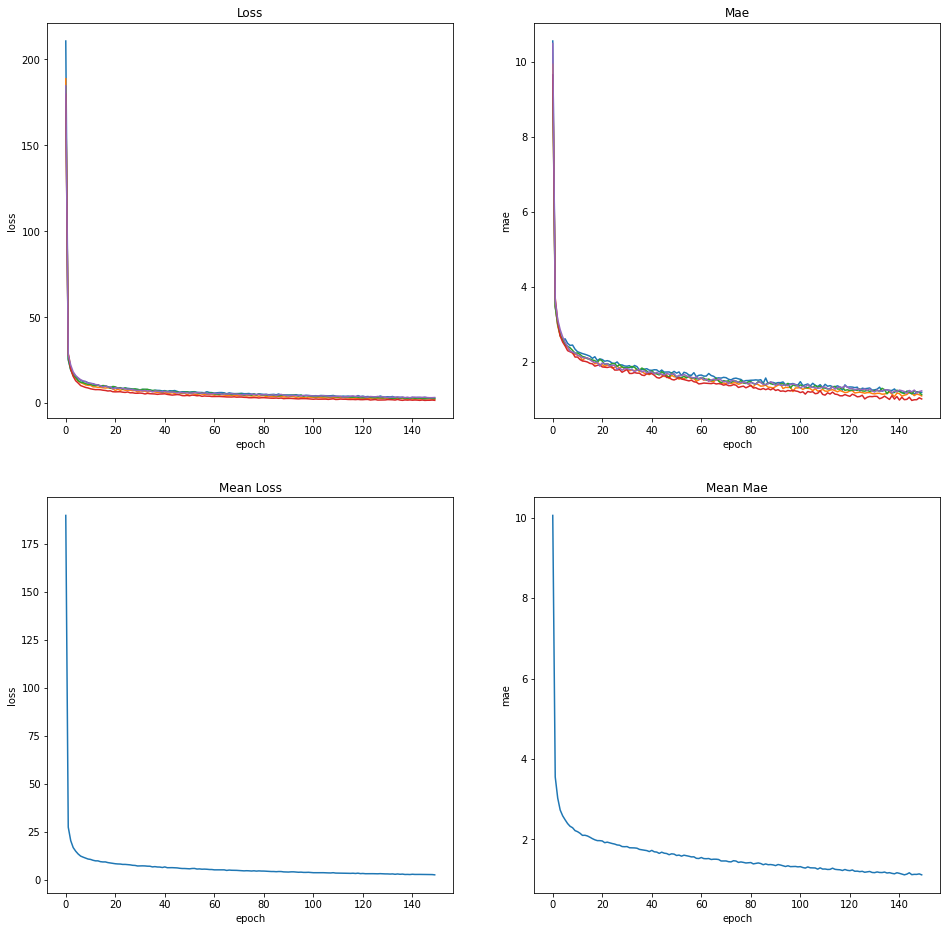

In [ ]:
graf(model_history)

In [ ]:
statistics(models)

model#1	k=4	epoch=100	sred_loss=10.5354	sred_mae=2.2643
model#2	k=4	epoch=50	sred_loss=11.1288	sred_mae=2.3524
model#3	k=4	epoch=150	sred_loss=16.3273	sred_mae=2.5874
model#4	k=5	epoch=50	sred_loss=10.5926	sred_mae=2.2438
model#5	k=5	epoch=100	sred_loss=11.346	sred_mae=2.3359
model#6	k=5	epoch=150	sred_loss=12.3396	sred_mae=2.4407


**Вывод**
<p>1) Можно заметить при k=4 после 100 эпох точность стала уменьшатся - это связано с переобучением модели.</p>
<p>2) Увеличение количества k не проводит к значительным улучшениям и так же после 100 эпох точность снижается</p>

Классификация - это предсказание к какому классу относится выходное значение.А регрессия направлена на прогназирование выходного значения.